In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Business Need

1. Create customer profiling for individual products
2. Provide insights on products and users

#### Will be looking at following
1. Variables with Product comparision using Visual Analysis - Univariate & Bivariate
2. Probabibility marginal and conditional
3. Customer Profiling based on data


In [2]:
df = pd.read_csv('2_Aerofit_Descriptive_Statistics_&_Probability.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [3]:
df.shape

(180, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


 ###### Info 
 We have a cleaned data and no missing values
 
 ###### outliers
 All the values except Income and Miles are having comparable mean and medians.
 There will be few ouliers in Miles and Income level

### Oulier removing

<AxesSubplot:xlabel='Product', ylabel='Income'>

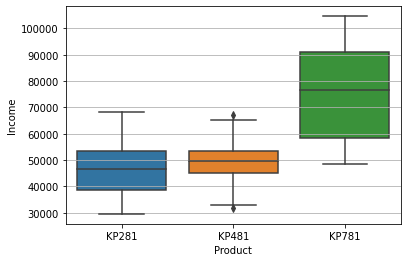

In [6]:
plt.grid()
sns.boxplot(data=df, x= 'Product', y='Income')

<AxesSubplot:xlabel='Product', ylabel='Miles'>

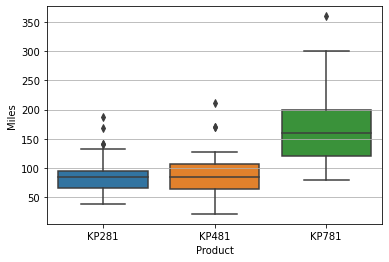

In [7]:
plt.grid()
sns.boxplot(data=df, x= 'Product', y='Miles')

In [8]:
df_KP281 = df[df['Product'] == 'KP281']
print(df_KP281.shape)
Q1 = df_KP281['Income'].quantile(0.25)
Q3 = df_KP281['Income'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.
low  = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR
df_KP281 = df_KP281[(df_KP281['Income'] > low) & (df_KP281['Income'] < high)]

Q1 = df_KP281['Miles'].quantile(0.25)
Q3 = df_KP281['Miles'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.
low  = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR
df_KP281 = df_KP281[(df_KP281['Miles'] > low) & (df_KP281['Miles'] < high)]

print(df_KP281.shape)
df_KP281.head()

(80, 9)
(76, 9)


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [9]:
df_KP481 = df[df['Product'] == 'KP481']
print(df_KP481.shape)
Q1 = df_KP481['Income'].quantile(0.25)
Q3 = df_KP481['Income'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.
low  = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR
df_KP481 = df_KP481[(df_KP481['Income'] > low) & (df_KP481['Income'] < high)]

Q1 = df_KP481['Miles'].quantile(0.25)
Q3 = df_KP481['Miles'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.
low  = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR
df_KP481 = df_KP481[(df_KP481['Miles'] > low) & (df_KP481['Miles'] < high)]
print(df_KP481.shape)
df_KP481.head()

(60, 9)
(55, 9)


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
81,KP481,20,Male,14,Single,2,3,32973,53
82,KP481,20,Female,14,Partnered,3,3,34110,106
83,KP481,20,Male,14,Single,3,3,38658,95
85,KP481,21,Male,16,Partnered,2,2,34110,42
86,KP481,21,Male,12,Partnered,2,2,32973,53


In [10]:
df_KP781 = df[df['Product'] == 'KP781']
print(df_KP781.shape)
Q1 = df_KP781['Income'].quantile(0.25)
Q3 = df_KP781['Income'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.
low  = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR
df_KP781 = df_KP781[(df_KP781['Income'] > low) & (df_KP781['Income'] < high)]

Q1 = df_KP781['Miles'].quantile(0.25)
Q3 = df_KP781['Miles'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.
low  = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR
df_KP781 = df_KP781[(df_KP781['Miles'] > low) & (df_KP781['Miles'] < high)]

print(df_KP781.shape)
df_KP781.head()

(40, 9)
(39, 9)


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
140,KP781,22,Male,14,Single,4,3,48658,106
141,KP781,22,Male,16,Single,3,5,54781,120
142,KP781,22,Male,18,Single,4,5,48556,200
143,KP781,23,Male,16,Single,4,5,58516,140
144,KP781,23,Female,18,Single,5,4,53536,100


In [11]:
df = pd.concat([df_KP281, df_KP481, df_KP781])
print(df.shape)
df

(170, 9)


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        170 non-null    object
 1   Age            170 non-null    int64 
 2   Gender         170 non-null    object
 3   Education      170 non-null    int64 
 4   MaritalStatus  170 non-null    object
 5   Usage          170 non-null    int64 
 6   Fitness        170 non-null    int64 
 7   Income         170 non-null    int64 
 8   Miles          170 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 13.3+ KB


In [13]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,28.858824,15.623529,3.417647,3.270588,53929.841176,99.264706
std,6.992224,1.631614,1.091514,0.953204,16443.049068,47.161631
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44343.000000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,51165.000000,89.500000
75%,33.000000,16.000000,4.000000,4.000000,58972.000000,113.000000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,300.000000


After outlier removal both Income and Miles have comparable mean and median

In [14]:
df['Product'].value_counts()
# 3 products with different number of users

KP281    76
KP481    55
KP781    39
Name: Product, dtype: int64

In [15]:
df['Product'].value_counts()/len(df) * 100 

KP281    44.705882
KP481    32.352941
KP781    22.941176
Name: Product, dtype: float64

#### Insight

###### Users base and product
More people buy entry level treadmill KP281 44.70 % of them. and 32.35% people have Mid level treadmill KP481 and only 22.94% people go for adv level treadmill

### 1. Variables with Product comparision

In [16]:
df.groupby(by='Gender')['Product'].value_counts().to_frame()

Product
Gender Product         
Female KP281         39
       KP481         28
       KP781          7
Male   KP281         37
       KP781         32
       KP481         27

#### Insight

###### Product and Gender 

KP281 - is prefered equally by Male and Female users

KP481 - is used By more males users compared to Feamle users

KP481 - Among this products users majoritty are Male

In [17]:
df.groupby(by='MaritalStatus')['Product'].value_counts().to_frame()

Product
MaritalStatus Product         
Partnered     KP281         46
              KP481         33
              KP781         22
Single        KP281         30
              KP481         22
              KP781         17

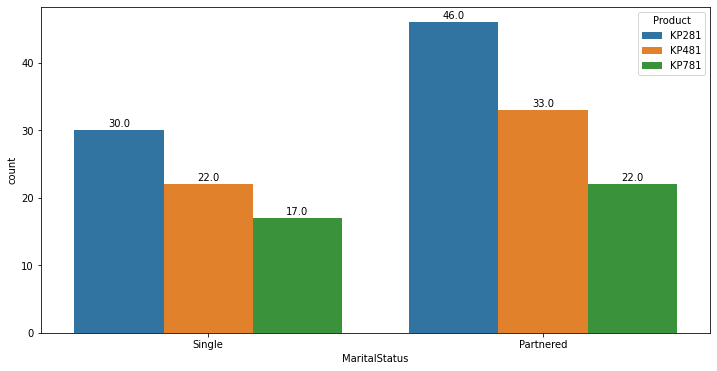

In [18]:
plt.figure(figsize=(12,6))
plot = sns.countplot(data = df, x = 'MaritalStatus', hue='Product' )
for p in plot.patches:
    plot.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+0.5))
plt.show()

#### Insight

###### Product and MaritalStatus 

More Partenered people use aerofit products compared to single ones, this is across all tredmills

<AxesSubplot:xlabel='Age', ylabel='count'>

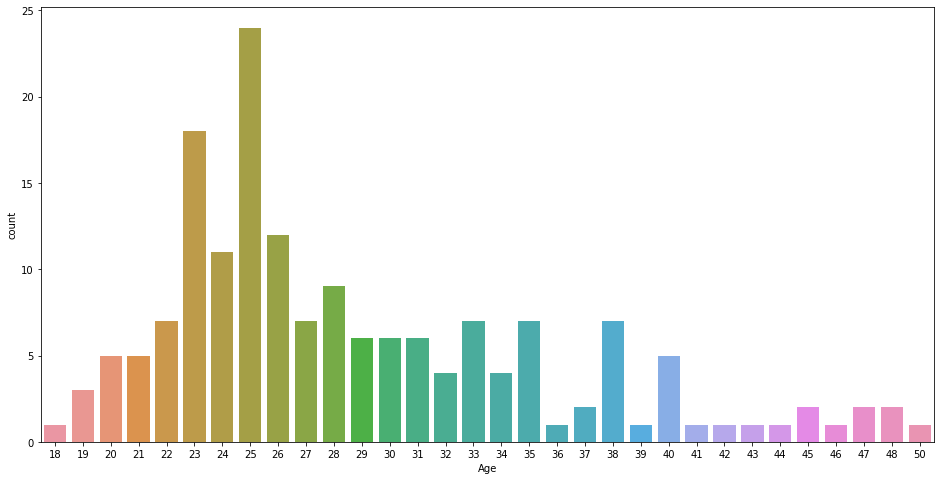

In [19]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x = 'Age')

<AxesSubplot:xlabel='Age', ylabel='count'>

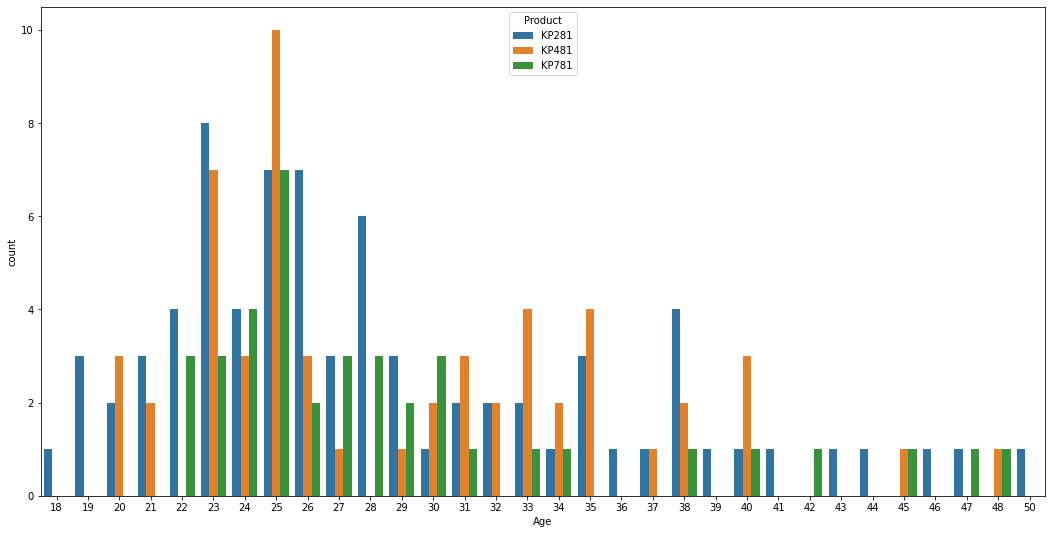

In [20]:
plt.figure(figsize=(18,9))
sns.countplot(data=df, x = 'Age', hue='Product')

#### Insight

###### Product and Age 

From graph we can see that people from age 21 to 30 are in highest volume.

KP281 - Most users are in 19 - 35 age group

KP481 - Most users are in 20 - 40 age group

KP781 - Most users are in 22 - 30 age group

<AxesSubplot:xlabel='Fitness', ylabel='count'>

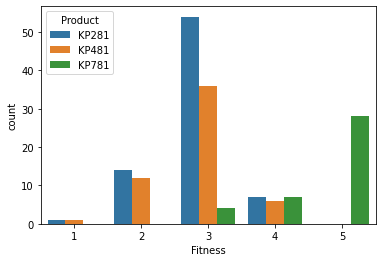

In [21]:
sns.countplot(data=df , x='Fitness', hue='Product')

#### Insight

###### Product and Fitness

People who use KP281 rate themselves 2 and 3 that suggests that they are not having good fiteness 

People who use KP481 rate themselves 3 that suggests that they are average in terms of fiteness

People who use KP781 rate themselves 5 that suggests that they are great in terms of fiteness



<AxesSubplot:xlabel='Education', ylabel='count'>

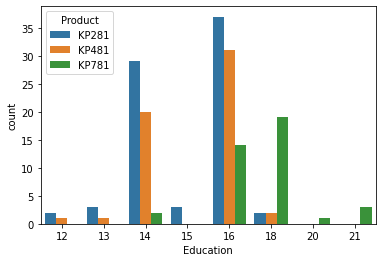

In [22]:
sns.countplot(data=df , x='Education', hue='Product')

#### Insight

###### Product and Education

People who use KP281 are mostly in education level of 12 to 16

People who use KP481 are mostly in education level of 14 to 16

People who use KP781 are mostly in education level of 16 to 21

<AxesSubplot:xlabel='Usage', ylabel='count'>

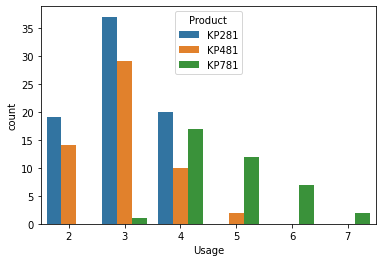

In [23]:
sns.countplot(data=df , x='Usage', hue='Product')

#### Insight

###### Product and Usage

People who use KP281 are mostly used 2 to 4 times a week

People who use KP481 are mostly used 2 to 5 times a wee

People who use KP781 are mostly used 4 to 7 times a week

<AxesSubplot:xlabel='Income', ylabel='Count'>

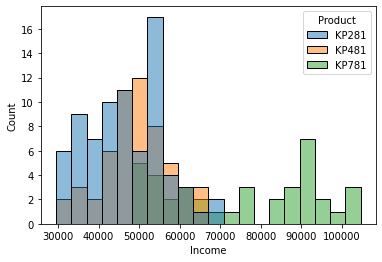

In [24]:
sns.histplot(data=df , x='Income', hue = 'Product', bins=20)

#### Insight

###### Product and Income

People who use KP281 and KP481 are mostly in salary range of 30000 to 60000

People who use KP781 are in salary range of 50000 to 100000

<AxesSubplot:xlabel='Product', ylabel='Miles'>

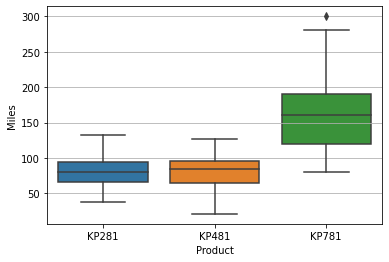

In [25]:
plt.grid()
sns.boxplot(data=df , x = 'Product', y='Miles')

#### Insight

###### Product and Miles

People who use KP281 and KP481 are similar interms of miles there isnt lot of difference between them, they generally avg run 65 to 90 miles a week

People who use KP781 are heavy users of treadmills they run on an avg 120 to 180 miles a week

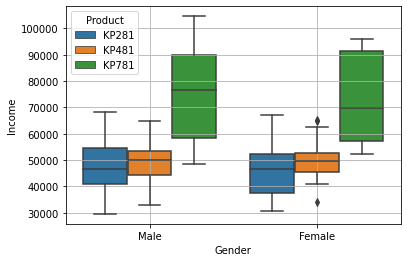

In [26]:
sns.boxplot(data=df , x ='Gender', y='Income',  hue='Product')
plt.grid()

#### Insight

###### Product and Gender and Income

People who use KP281 have median income of 48000 for both male and female 
People who use KP481 have median income of 50000 for both male and female 

People who have KP781 are higher income people, where Males tends to have higher range compared to Female, Male median income 78000, Female median income is 70000

<AxesSubplot:xlabel='Age', ylabel='Income'>

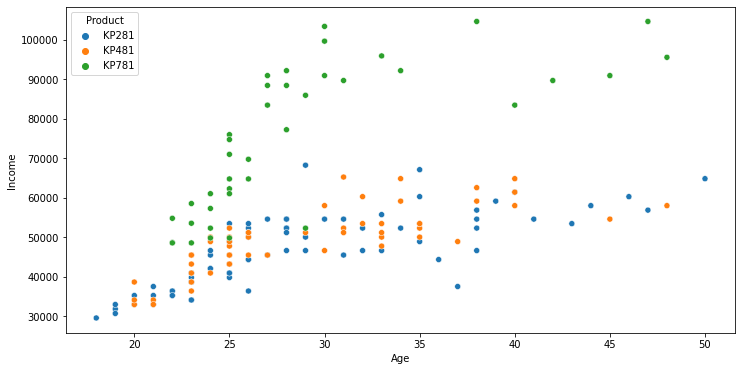

In [27]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df , x ='Age', y='Income',  hue='Product')

#### Insight

###### Product and Age and Income

KP281 and KP481 treadmills have same set of user base interms of income, and there is a very clear difference in KP781 users. 

Mostly younger users between 22 to 27 with 50000 to 60000 income still go for KP781 but bit older users in 30 to 40 age group with same income level got for KP281 and KP481

<AxesSubplot:xlabel='Age', ylabel='Miles'>

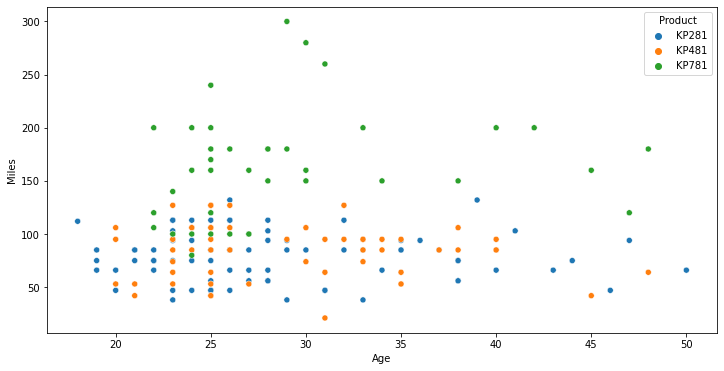

In [28]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df , x ='Age', y='Miles',  hue='Product')

#### Insight

###### Product and Age and Miles

KP281 and KP481 users across all age group seem to have same range of miles and they overlap

KP781 users most of them are in higher Miles across all age group 


<AxesSubplot:xlabel='Income', ylabel='Miles'>

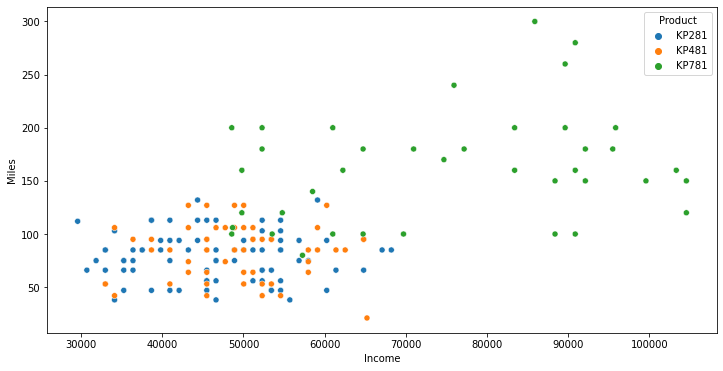

In [29]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df , x ='Income', y='Miles',  hue='Product')

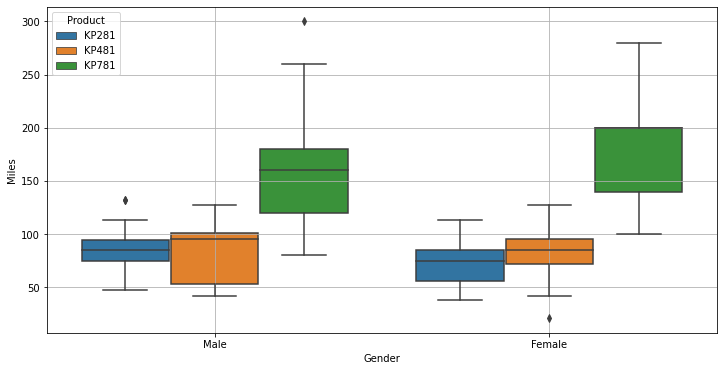

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df , x ='Gender', y='Miles',  hue='Product')
plt.grid()

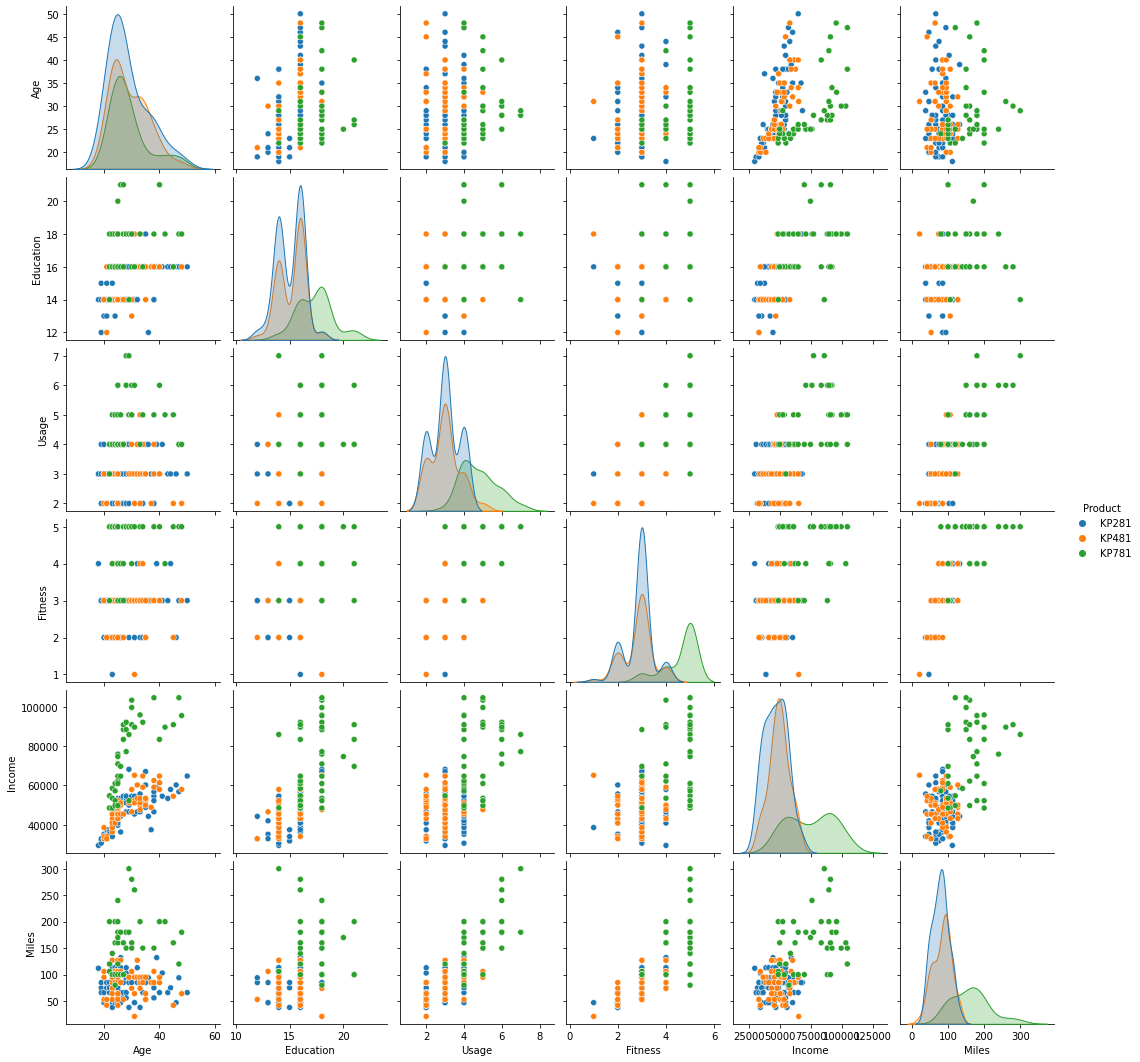

In [31]:
sns.pairplot(data=df, hue='Product')

<AxesSubplot:>

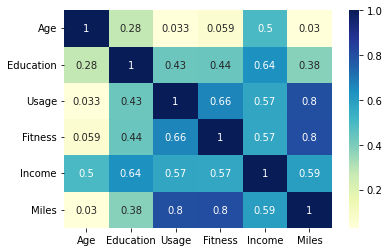

In [32]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

#### Insight

###### Correlation

usage and Miles, Fitness and miles, Usage and Fitness have higher correlation.

Age and (Uage, Fitness, Miles) have very low correlation


### 2.Probabibility marginal and conditional

In [33]:
pd.crosstab(df.Usage, df.Product, margins=True)

Product,KP281,KP481,KP781,All
Usage,,,,
2,19,14,0,33
3,37,29,1,67
4,20,10,17,47
5,0,2,12,14
6,0,0,7,7
7,0,0,2,2
All,76,55,39,170


In [34]:
pd.crosstab(df.Usage, df.Product, margins=True, normalize='columns')

Product,KP281,KP481,KP781,All
Usage,,,,
2,0.250000,0.254545,0.000000,0.194118
3,0.486842,0.527273,0.025641,0.394118
4,0.263158,0.181818,0.435897,0.276471
5,0.000000,0.036364,0.307692,0.082353
6,0.000000,0.000000,0.179487,0.041176
7,0.000000,0.000000,0.051282,0.011765


#### Insight

Among KP281, KP481 users most users use it 3 to 4 times

Among KP781 users most users use it 4 to 6 times


In [35]:
pd.crosstab(df.Fitness, df.Product, margins=True, normalize='columns')

Product,KP281,KP481,KP781,All
Fitness,,,,
1,0.013158,0.018182,0.000000,0.011765
2,0.184211,0.218182,0.000000,0.152941
3,0.710526,0.654545,0.102564,0.552941
4,0.092105,0.109091,0.179487,0.117647
5,0.000000,0.000000,0.717949,0.164706


#### Insight

KP281 and KP481 users most in fiteness level 3 

KP781 users are in fitness level 5


In [36]:
pd.crosstab(df.Age, df.Product, margins=True, normalize='columns')

Product,KP281,KP481,KP781,All
Age,,,,
18,0.013158,0.000000,0.000000,0.005882
19,0.039474,0.000000,0.000000,0.017647
20,0.026316,0.054545,0.000000,0.029412
21,0.039474,0.036364,0.000000,0.029412
22,0.052632,0.000000,0.076923,0.041176
23,0.105263,0.127273,0.076923,0.105882
24,0.052632,0.054545,0.102564,0.064706
25,0.092105,0.181818,0.179487,0.141176
26,0.092105,0.054545,0.051282,0.070588


In [37]:
pd.crosstab(df.Education, df.Product, margins=True, normalize='columns')

Product,KP281,KP481,KP781,All
Education,,,,
12,0.026316,0.018182,0.000000,0.017647
13,0.039474,0.018182,0.000000,0.023529
14,0.381579,0.363636,0.051282,0.300000
15,0.039474,0.000000,0.000000,0.017647
16,0.486842,0.563636,0.358974,0.482353
18,0.026316,0.036364,0.487179,0.135294
20,0.000000,0.000000,0.025641,0.005882
21,0.000000,0.000000,0.076923,0.017647


In [38]:
pd.crosstab(df.MaritalStatus, df.Product, margins=True, normalize='columns')

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,0.605263,0.6,0.564103,0.594118
Single,0.394737,0.4,0.435897,0.405882


In [39]:
pd.crosstab(df.Gender, df.Product, margins=True, normalize=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.229412,0.164706,0.041176,0.435294
Male,0.217647,0.158824,0.188235,0.564706
All,0.447059,0.323529,0.229412,1.000000


In [40]:
 pd.crosstab([df.Usage, df.Fitness], df.Product, margins=True, normalize=True)

Product           KP281     KP481     KP781       All
Usage Fitness                                        
2     1        0.000000  0.005882  0.000000  0.005882
      2        0.052941  0.029412  0.000000  0.082353
      3        0.058824  0.047059  0.000000  0.105882
3     1        0.005882  0.000000  0.000000  0.005882
      2        0.023529  0.035294  0.000000  0.058824
      3        0.158824  0.105882  0.000000  0.264706
      4        0.029412  0.029412  0.000000  0.058824
      5        0.000000  0.000000  0.005882  0.005882
4     2        0.005882  0.005882  0.000000  0.011765
      3        0.100000  0.047059  0.023529  0.170588
      4        0.011765  0.005882  0.011765  0.029412
      5        0.000000  0.000000  0.064706  0.064706
5     3        0.000000  0.011765  0.000000  0.011765
      4        0.000000  0.000000  0.023529  0.023529
      5        0.000000  0.000000  0.047059  0.047059
6     4        0.000000  0.000000  0.005882  0.005882
      5        0.000000  0.000000  0.035294  0.035294
7     5        0.000000  0.000000  0.011765  0.011765
All            0.447059  0.323529  0.229412  1.000000

### 3. Customer profiling

Based on the data

##### KP281 treadmill users are having following attributes:

- Age: 19 to 35 years	
- Gender:	Both male and Female use it
- Education: level of 12 to 16
- MaritalStatus: Both single and Partnered use it, Majority being Partnered	
- Usage: 2 to 4 times a week
- Income: 30000 - 60000	 (in $)
- Fitness: 2 to 3
- Miles: 65 to 90 miles week


##### KP481 treadmill users are having following attributes:

- Age: 20 to 40 years	
- Gender: Male and female both use it, majority being male
- Education: level of 14 to 16
- MaritalStatus: Both single and Partnered use it, Majority being Partnered	
- Usage: 2 to 5 times a week
- Income: 30000 - 60000	 (in $)
- Fitness: 3
- Miles: 65 to 90 miles week

##### KP781 treadmill users are having following attributes:

- Age: 22 to 30 years	
- Gender:	Majorly used by male, very few Female use it
- Education: level of 16 to 21
- MaritalStatus: Both single and Partnered use it, Majority being Partnered	
- Usage: 4 to 7 times a week
- Income: 50000 - 100000	 (in $)
- Fitness: 5
- Miles: 120 to 180 miles week